In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/not pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if not pass, 1 if test passed

In [16]:
hearing_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\hearing_test.csv')
hearing_df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


### Exploratory Data Analysis

In [4]:
hearing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
hearing_df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
hearing_df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

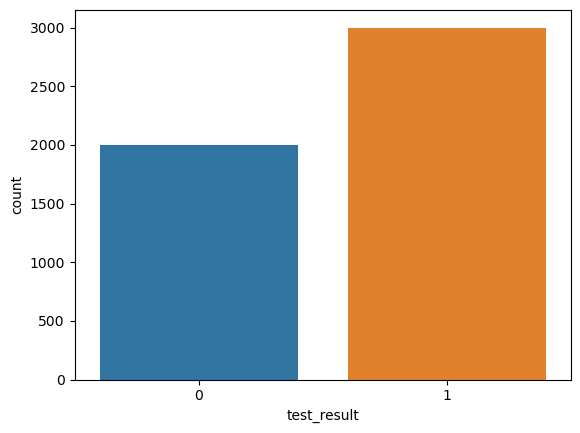

In [7]:
sns.countplot(data=hearing_df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

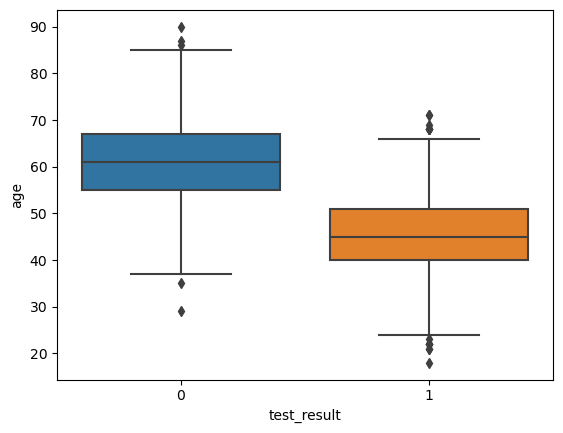

In [8]:
sns.boxplot(data=hearing_df, x='test_result', y='age')

It does not make sense to plot age vs test result: age is the independent variable.
Let's plot test result vs age:

<Axes: xlabel='age', ylabel='test_result'>

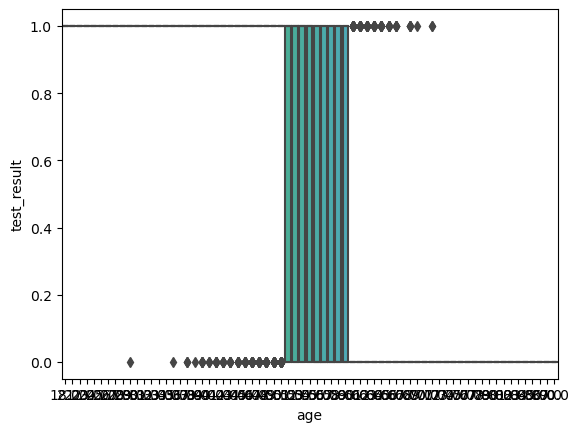

In [17]:
sns.boxplot(data=hearing_df, x='age', y='test_result')
# plt.tight_layout()

Plot of test result vs age yields an unreadable x-axis labels. Reproducing age vs test result plot for clarity's sake.

<Axes: xlabel='test_result', ylabel='age'>

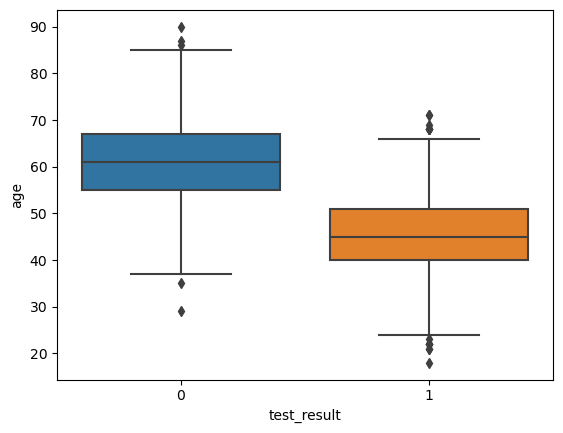

In [8]:
sns.boxplot(data=hearing_df, x='test_result', y='age')

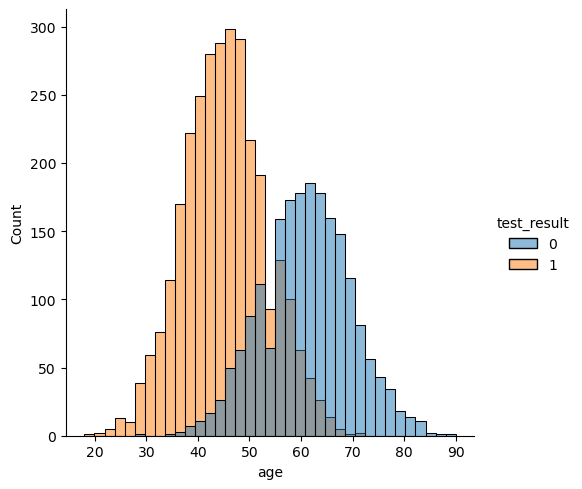

In [18]:
sns.displot(data=hearing_df, x='age', hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

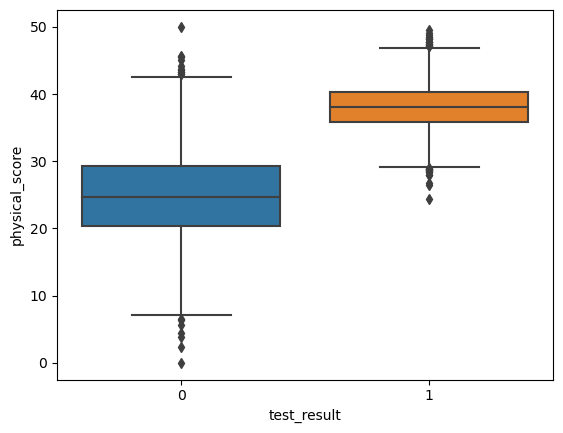

In [14]:
# plotting test score vs test result

sns.boxplot(data=hearing_df, y='physical_score', x='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

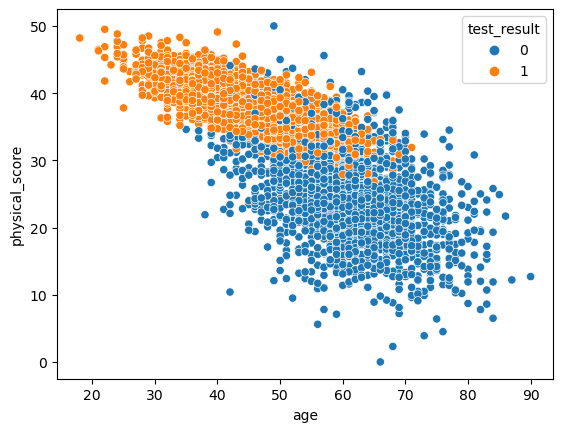

In [19]:
sns.scatterplot(data=hearing_df, x='age', y='physical_score', hue='test_result')

In [20]:
hearing_df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

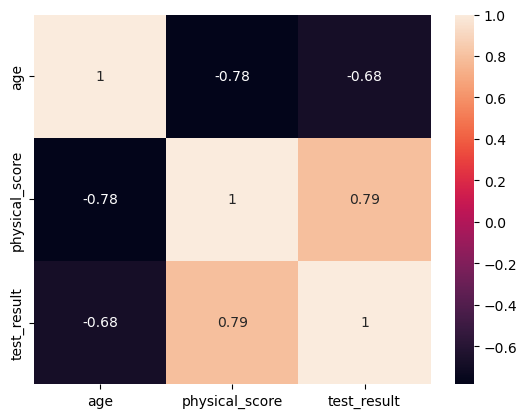

In [21]:
# plotting correlations

sns.heatmap(data=hearing_df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

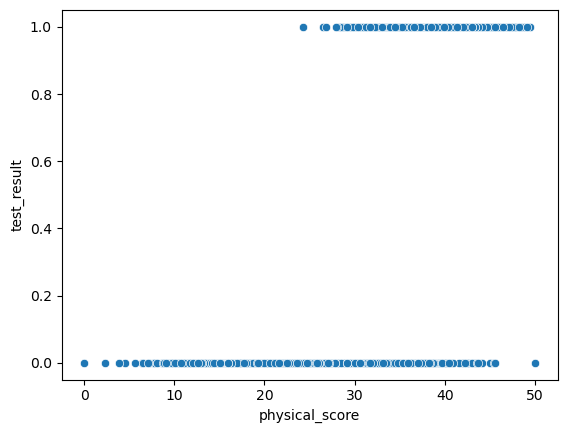

In [23]:
sns.scatterplot(data=hearing_df, x='physical_score', y='test_result')

<Axes: xlabel='age', ylabel='test_result'>

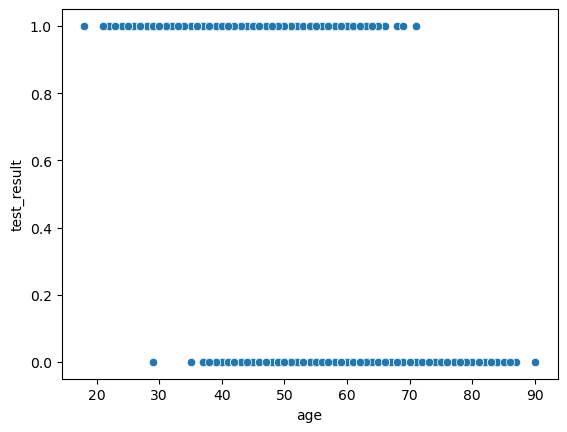

In [24]:
sns.scatterplot(data=hearing_df, x='age', y='test_result')

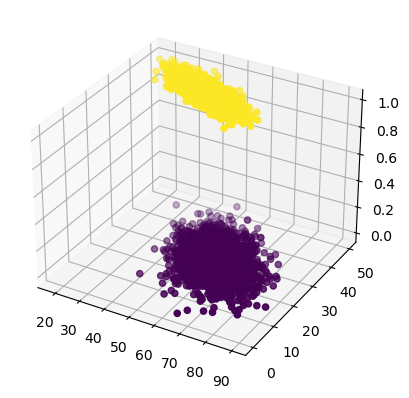

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hearing_df['age'], hearing_df['physical_score'], hearing_df['test_result'], c=hearing_df['test_result'])

### Train | Test Split and Scaling

In [27]:
from sklearn.model_selection import train_test_split

X = hearing_df.drop('test_result', axis=1)
y = hearing_df['test_result']

print(f'X.shape: {X.shape}, y.shape: {y.shape})')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X.shape: (5000, 2), y.shape: (5000,))
X_train.shape: (4500, 2)
X_test.shape: (500, 2)
y_train.shape: (4500,)
y_test.shape: (500,)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# we do not scale y because it's the labels column

print(f'scaled_X_train.shape: {scaled_X_train.shape}')
print(f'scaled_X_test.shape: {scaled_X_test.shape}')

scaled_X_train.shape: (4500, 2)
scaled_X_test.shape: (500, 2)


In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [32]:
print(f'log_model.coef_: {log_model.coef_}')
print(f'log_model.intercept_: {log_model.intercept_}')

log_model.coef_: [[-0.94953524  3.45991194]]
log_model.intercept_: [0.48867341]


Plotting fit of the logistic regression model tends to be complicated. We are continuing on to predictions and will use confusion matrix and classification report to evaluate model performance.

In [34]:
y_pred = log_model.predict(scaled_X_test)

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 
The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

In [35]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Model Performance on Classification Tasks

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.924

In [39]:
confusion_matrix(y_test, y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

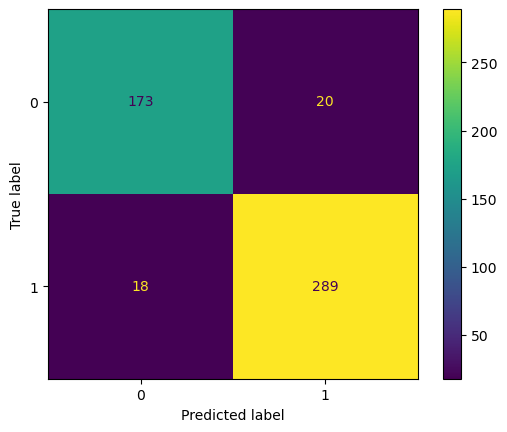

In [41]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

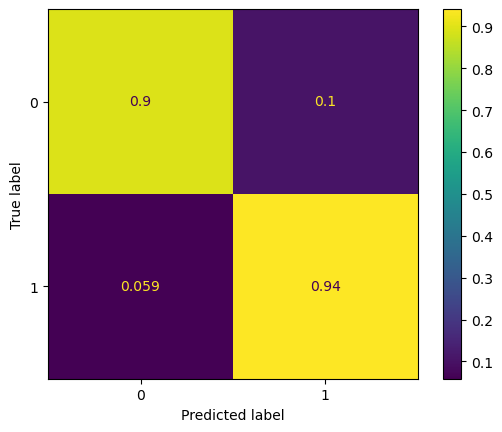

In [43]:
# visualizing normalization of confusion matrix

ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.90       193\n           1       0.94      0.94      0.94       307\n\n    accuracy                           0.92       500\n   macro avg       0.92      0.92      0.92       500\nweighted avg       0.92      0.92      0.92       500\n'

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



## Evaluating Curves and AUC

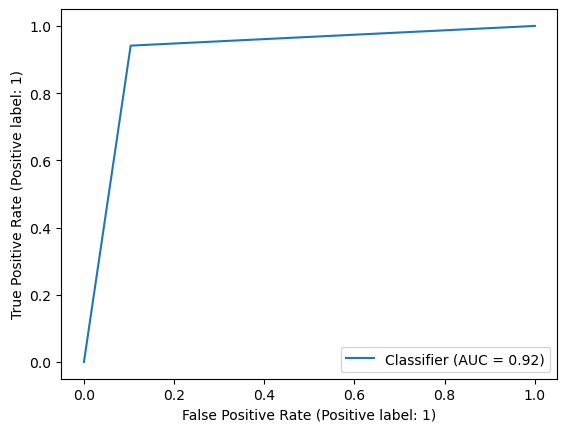

In [47]:
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_pred)

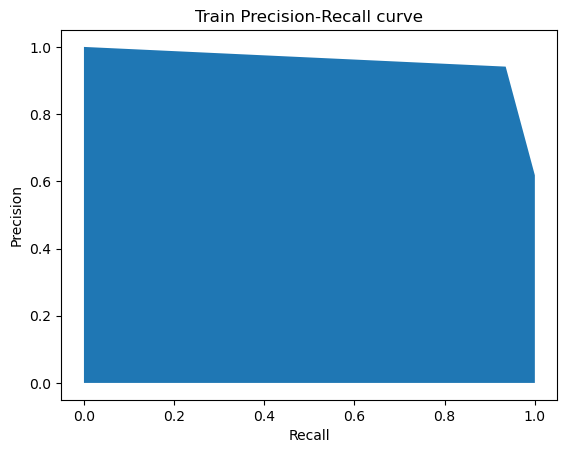

In [48]:
precision, recall, thresholds = precision_recall_curve(y_pred, y_test)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [49]:
precision_recall_curve(y_test, y_pred)

(array([0.614     , 0.93527508, 1.        ]),
 array([1.        , 0.94136808, 0.        ]),
 array([0, 1], dtype=int64))